In [2]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom


In [6]:
input_path = "data/"
img_name = "metacarpals.png"
img = io.imread(input_path + img_name)
img.shape, img.dtype

((512, 512), dtype('uint8'))

## Display image

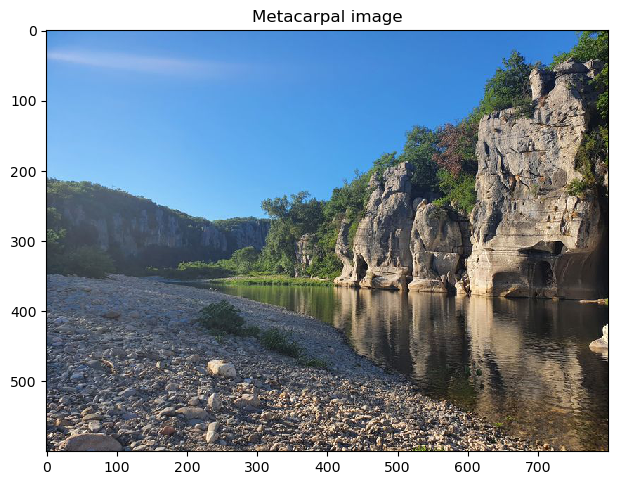

In [42]:
io.imshow(img)
plt.title("Metacarpal image")
io.show()

## Color maps
When working with gray level images, they are viewed using 256 levels of gray. There is another method of viewing them using a color map where each gray level is shown as a color. Matplotlib has several predefined color maps.

* This is what cmap meanss!!!!

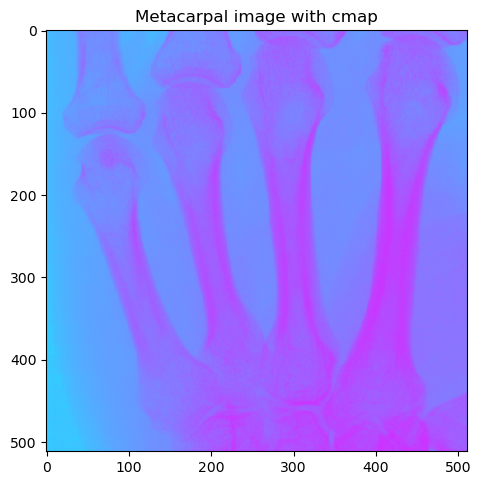

In [9]:

io.imshow(img, cmap="cool")
plt.title("Metacarpal image with cmap")
io.show()

## Grey scale scaling

Sometimes, there is a lack of contrast in an image or the brightness levels are not optimals. It possible to scale the way the image is visualized, by forcing a pixel value range to use the full gray scale range (from white to black).


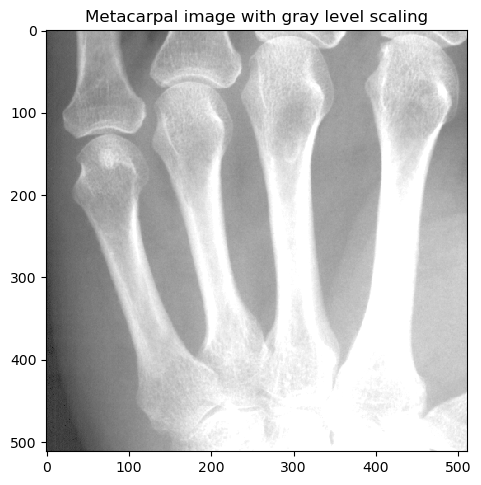

In [10]:
# Pixels with values of 20 and below will be visualized black 
# Pixels with values of 170 and above as white and values in between as shades of gray.
io.imshow(img, vmin=20, vmax=170)
plt.title("Metacarpal image with gray level scaling")
io.show()

In [12]:
smallest_pixel_value = np.amin(img)
largest_pixel_value = np.amax(img)
smallest_pixel_value, largest_pixel_value

(32, 208)

## Histogram functions

A histogram plots the number of observations for each range of the values of the numeric feature. These ranges are called as Bins. The shape of the distribution depends on the size (width or edges) of the bins.

In [15]:
# Since the histogram functions takes 1D arrays as input, the function ravel is called to convert the image into a 1D array.
img.ravel()

array([ 63,  67,  68, ..., 160, 158, 152], dtype=uint8)

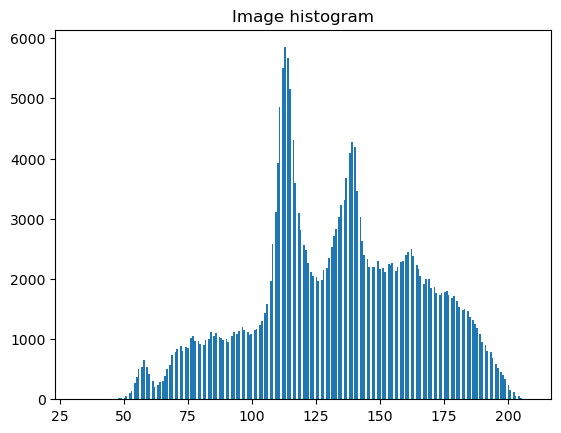

In [21]:
# The towers or bars of a histogram are called bins. The height of each bin shows how many values from that data fall into that range.
# Determines how fine the visualization would be
h = plt.hist(img.ravel(), bins=256)
plt.title("Image histogram")
io.show()

In [26]:
# Here h is a list of tuples, where in each tuple the first element is the bin count and the second is the bin edge. 
# To check for a given number of pixels in a bin
target_bin_no = 100
count = h[0][target_bin_no]
count, h

(1147.0,
 (array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
         0.000e+00, 2.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
         0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 3.000e+00,
         4.000e+00, 0.000e+00, 3.000e+00, 8.000e+00, 0.000e+00, 1.700e+01,
         2.300e+01, 0.000e+00, 2.800e+01, 6.100e+01, 0.000e+00, 1.120e+02,
         1.400e+02, 0.000e+00, 2.730e+02, 3.660e+02, 4.960e+02, 0.000e+00,
         5.370e+02, 6.480e+02, 0.000e+00, 5.290e+02, 4.130e+02, 0.000e+00,
         3.050e+02, 2.090e+02, 0.000e+00, 2.410e+02, 2.930e+02, 0.000e+00,
         3.050e+02, 3.940e+02, 4.950e+02, 0.000e+00, 5.700e+02, 7.280e+02,
         0.000e+00, 7.870e+02, 8.310e+02, 0.000e+00, 8.790e+02, 8.100e+02,
         0.000e+00, 8.720e+02, 8.470e+02, 0.000e+00, 1.012e+03, 1.051e+03,
         9.700e+02, 0.000e+00, 9.680e+02, 9.240e+02, 0.000e+00, 9.050e+02,
         9.770e+02, 0.000e+00, 1.008e+03, 1.111e+03, 0.000e+00, 1.059e+03,
         1.096e+

In [27]:
bin_left = h[1][target_bin_no]
bin_right = h[1][target_bin_no + 1]
bin_left, bin_right

(100.75, 101.4375)

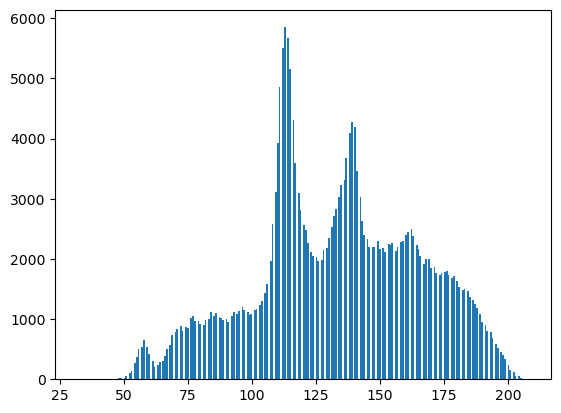

In [28]:
y, x, _ = plt.hist(img.ravel(), bins=256)

## Pixel values and image coordinate systems
We are using scikit-image and the image is represented using a NumPy array. Therefore, a two-dimensional image is indexed by rows and columns (abbreviated to (row, col) or (r, c)) with (0, 0) at the top-left corner.

In [32]:
# Finding value of a pixel
# Row 20, Column 30
img[20, 30]

83

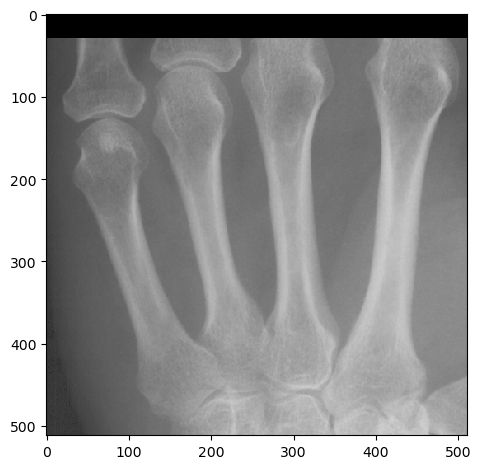

In [35]:
# Sets the first 30 rows to black
img[:30] = 0
io.imshow(img)
io.show()

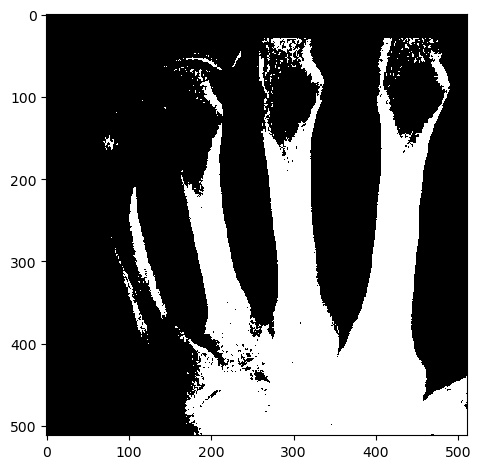

In [36]:
mask = img > 150
io.imshow(mask)
io.show()

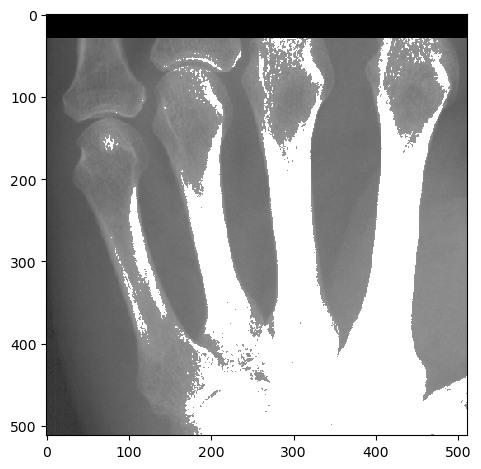

In [38]:
# Sets all pixels with the masked value to white
img[mask] = 255
io.imshow(img)
io.show()

## Color images
In a color image, each pixel is defined using three values: R (red), G (green), and B (blue).



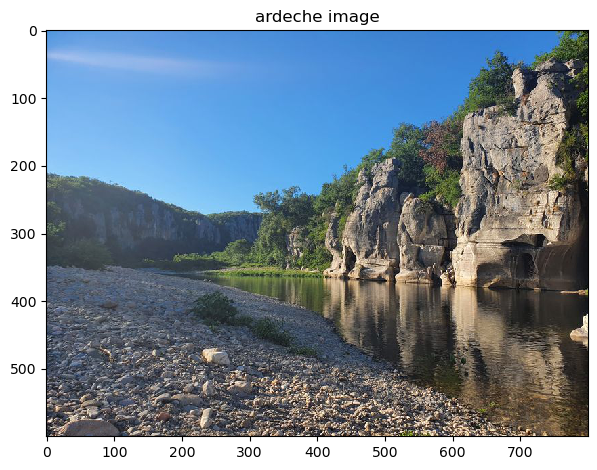

((600, 800, 3), dtype('uint8'), array([104, 163, 229], dtype=uint8))

In [46]:
img_name = "ardeche.jpg"
img = io.imread(input_path + img_name)
plt.title("ardeche image")
io.imshow(img)
io.show()
img.shape, img.dtype, img[20][30]

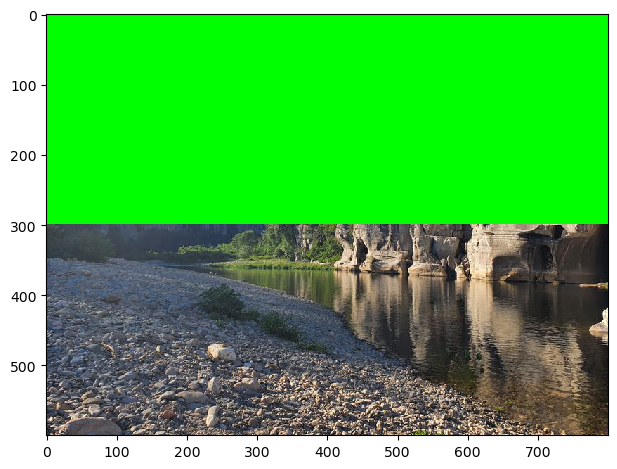

In [53]:
r = 110
c = 90
rows = img.shape[0]
img[r, c] = [255, 0, 0]
img[:rows//2] = [0, 255, 0]
io.imshow(img)

## Working with your own image

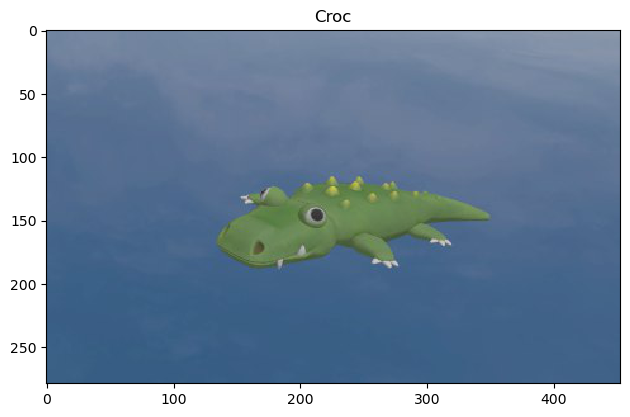

((279, 453, 3),
 dtype('uint8'),
 array([[[114, 134, 161],
         [113, 133, 160],
         [113, 133, 160],
         ...,
         [139, 152, 171],
         [139, 152, 171],
         [139, 152, 171]],
 
        [[113, 133, 160],
         [113, 133, 160],
         [113, 133, 160],
         ...,
         [139, 152, 171],
         [139, 152, 171],
         [139, 152, 171]],
 
        [[113, 133, 160],
         [113, 133, 160],
         [113, 133, 160],
         ...,
         [139, 152, 171],
         [139, 152, 171],
         [139, 152, 171]],
 
        ...,
 
        [[ 58,  96, 133],
         [ 58,  96, 133],
         [ 58,  96, 133],
         ...,
         [ 63,  97, 135],
         [ 63,  97, 135],
         [ 63,  97, 135]],
 
        [[ 58,  96, 133],
         [ 58,  96, 133],
         [ 58,  96, 133],
         ...,
         [ 63,  97, 135],
         [ 63,  97, 135],
         [ 63,  97, 135]],
 
        [[ 58,  96, 133],
         [ 58,  96, 133],
         [ 58,  96, 133],
         

In [63]:
img_name = "croc.jpeg"
img = io.imread(input_path + img_name)
io.imshow(img)
plt.title("Croc")
io.show()
img.shape, img.dtype, img

### Rescaling

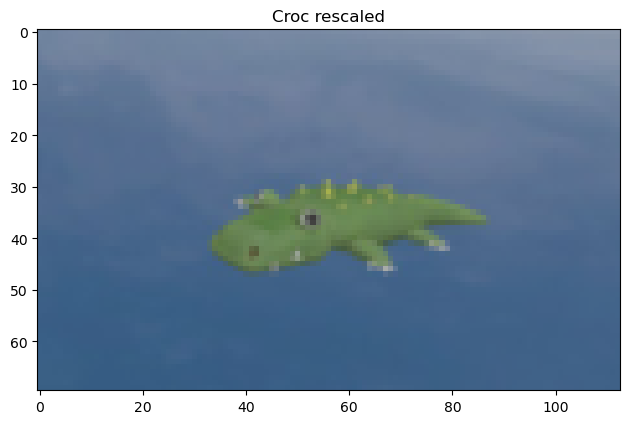

array([[[0.44307777, 0.52150914, 0.62739149],
        [0.44041777, 0.51884914, 0.62473149],
        [0.43831666, 0.51674746, 0.62263001],
        ...,
        [0.5441481 , 0.59512882, 0.66963894],
        [0.54430597, 0.59528668, 0.6697968 ],
        [0.54456398, 0.59554469, 0.67005482]],

       [[0.44091538, 0.51934675, 0.62522911],
        [0.43848994, 0.51692132, 0.62280367],
        [0.43631884, 0.51474964, 0.62063218],
        ...,
        [0.5324358 , 0.58416954, 0.65943268],
        [0.53296905, 0.58470278, 0.65996593],
        [0.5336362 , 0.58536993, 0.66063308]],

       [[0.43570048, 0.51413183, 0.62001425],
        [0.43573441, 0.51416578, 0.62004813],
        [0.4360713 , 0.5145021 , 0.62038442],
        ...,
        [0.51638447, 0.57440538, 0.65595631],
        [0.51835404, 0.57637496, 0.65792597],
        [0.51704053, 0.57506145, 0.65661267]],

       ...,

       [[0.22843913, 0.37745874, 0.52255678],
        [0.22833908, 0.37735869, 0.52245673],
        [0.22754787, 0

In [65]:
# Here we selected a scale factor of 0.25. We also specify, that we have more than one channel (since it is RGB) and that the channels are kept in the third dimension of the NumPy array. 
# The rescale function has this side effect, that it changes the type of the pixel values.
img_rescaled = rescale(img, 0.25, anti_aliasing=True, channel_axis=2)

io.imshow(img_rescaled)
plt.title("Croc rescaled")
io.show()
img_rescaled

### Resizing

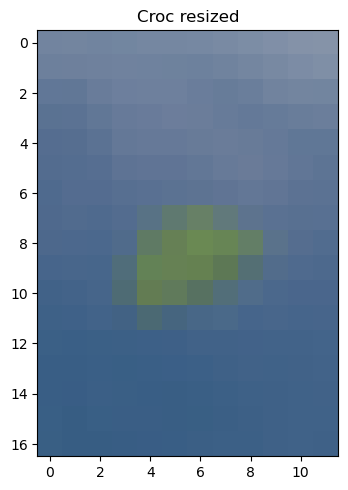

In [69]:
img_resized = resize(
    img, (img.shape[0] // 4, img.shape[1] // 6), anti_aliasing=True
)
io.imshow(img_resized)
plt.title("Croc resized")
io.show()


### Conversion to gray
We are forcing the pixel type back into unsigned bytes using the img_as_ubyte function, since the rgb2gray functions returns the pixel values as floating point numbers.

In [70]:
img_gray = color.rgb2gray(img)
img_byte = img_as_ubyte(img_gray)

### Extra refreshers

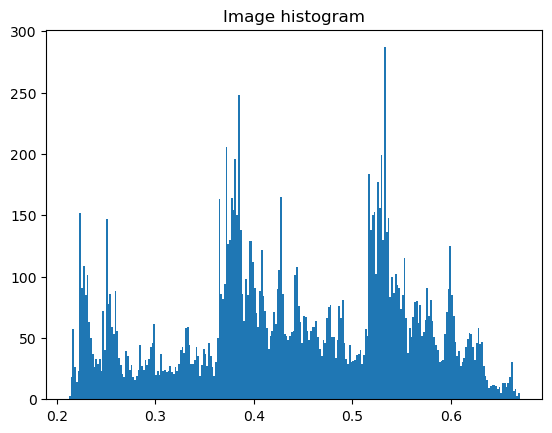

In [71]:
h = plt.hist(img.ravel(), bins=256)
plt.title("Image histogram")
io.show()

In [ ]:
# https://www.researchgate.net/publication/370722462/figure/fig2/AS:11431281215477264@1704252011894/Histogram-of-dark-images-showing-different-regions-a-dark-image-without-any-optical.png

## Color channels

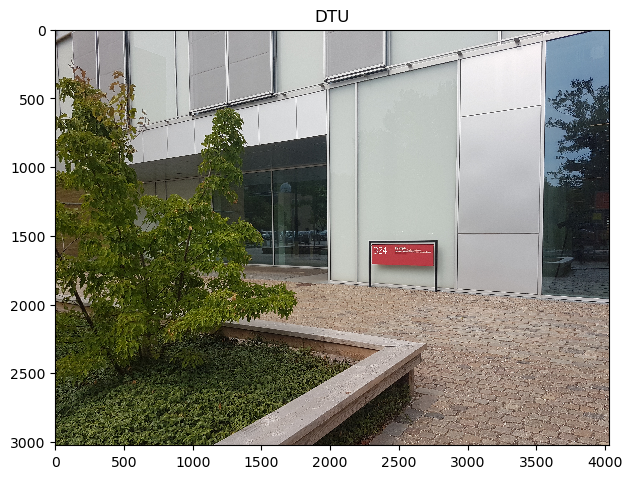

In [74]:
img_name = "DTUSign1.jpg"
img = io.imread(input_path + img_name)
io.imshow(img)
plt.title("DTU")
io.show()

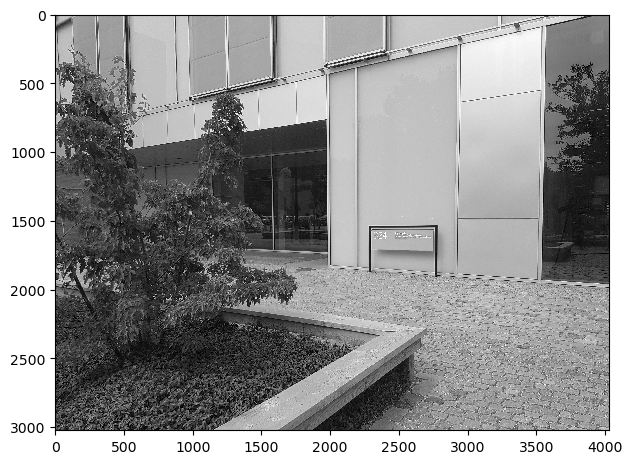

In [83]:
r_comp = img[:, :, 0]
io.imshow(r_comp)

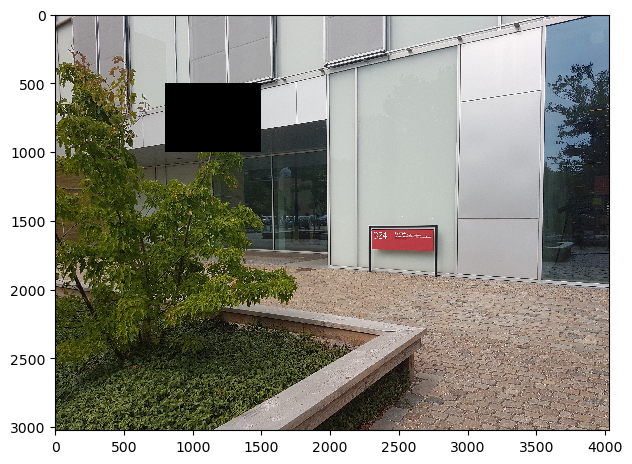

In [88]:
# Draw rectangle
img[500:1000, 800:1500, :] = 0
io.imshow(img)
io.imsave(input_path + "blackboxdtu.png", img)

In [112]:
img_name = "metacarpals.png"
img = io.imread(input_path + img_name)
mask = img > 140
img = color.gray2rgb(img)
img[mask] = [0, 0, 255]

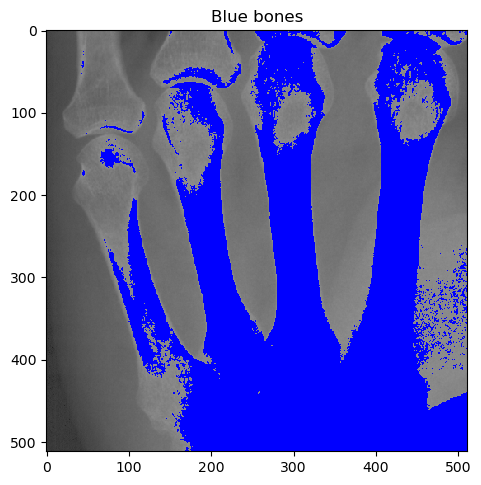

In [113]:
io.imshow(img)
plt.title("Blue bones")
io.show()

 ## Advanced Image Visualization

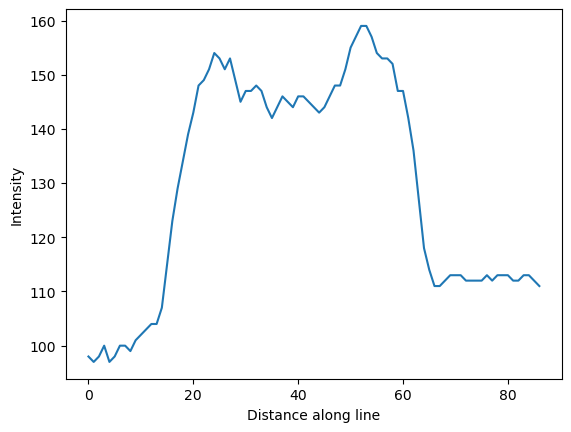

In [115]:
image_name = "metacarpals.png"
img = io.imread(input_path + image_name)
# Return the intensity profile of an image measured along a scan line.
p = profile_line(img, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel("Intensity")
plt.xlabel("Distance along line")
plt.show()

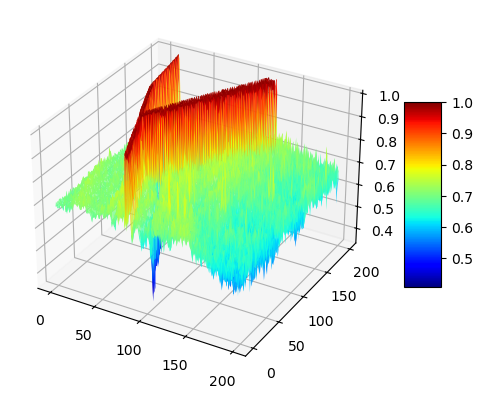

In [116]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40 : 40 + ll, 150 : 150 + ll]
xx, yy = np.mgrid[0 : im_crop.shape[0], 0 : im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(
    xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet, linewidth=0
)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Dicom images
Typical images from the hospital are stored in the DICOM format. An example image from a computed tomography examination of abdominal area is used in the following.

In [117]:
in_dir = "data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 174
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008, 0020) Study Date                          DA: '20140914'
(0008, 0030) Study Time                          TM: ''
(0008, 0050) Accession N

This image has been anonymized so patient information has been removed. Else the patients name and diagnosis are sometimes also available. This makes medical images very complicated to share due to the need of protecting patient privacy.

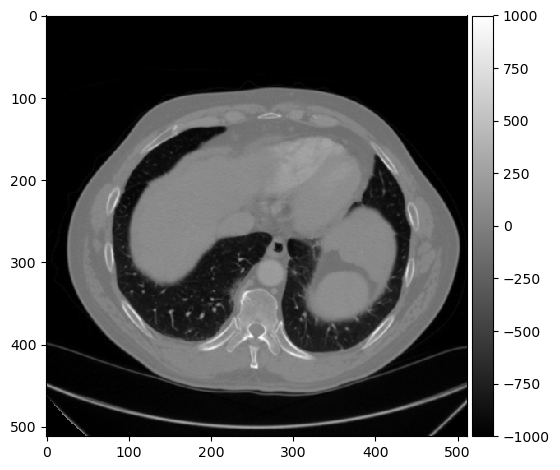

((512, 512), dtype('int16'))

In [120]:
im = ds.pixel_array
io.imshow(im, vmin=-1000, vmax=1000, cmap="gray")
io.show()
im.shape, im.dtype

As can be seen, the pixel values are stored as 16 bit integers and therefore it is necessary to specify which value range that should be mapped to the gray scale spectrum (using vmin and vmax). Try to experiment with the vmin and vmax values to get the best possible contrast in the image.